In [ ]:
from matplotlib import pyplot
from keras.datasets import cifar10

In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

In [ ]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


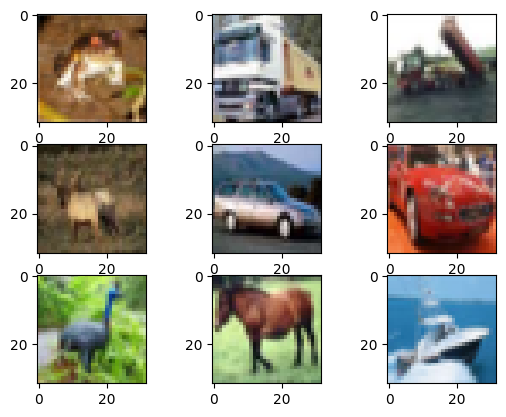

In [ ]:
# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [ ]:
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.optimizers import RMSprop

# Normalize the inputs
X_train = trainX.astype('float32') / 255.0
X_test = testX.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(trainy, 10)
y_test = to_categorical(testy, 10)

print("Shape of y_train:", y_train.shape)  # Should be (num_samples, 10)
print("Shape of y_test:", y_test.shape)    # Should be (num_samples, 10)

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 units (one for each class)

# Compile the model
sgd = SGD(lr = 0.01, momentum = 0.9)
#rmsprop = RMSprop(lr = 0.001)
model.compile(optimizer= sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size= 256, validation_data=(X_test, y_test))

# Extract training and validation accuracy
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Lists to store accuracy values for every 10th epoch
train_accuracy_list = []
test_accuracy_list = []

# Print and store accuracy for every epoch
for i, (train_acc, test_acc) in enumerate(zip(train_accuracy, test_accuracy)):
    if (i + 1) % 10 == 0:
        print(f'Epoch {i + 1}: Training Accuracy {train_acc}, Testing Accuracy {test_acc}')
    train_accuracy_list.append(train_acc)
    test_accuracy_list.append(test_acc)

# Evaluate the model
_, accuracy_t = model.evaluate(X_test, y_test)  # Ensure you use one-hot encoded labels here
print('Final Testing Accuracy: %.2f' % (accuracy_t * 100))

Shape of y_train: (50000, 10)
Shape of y_test: (10000, 10)


Epoch 1/50
196/196 [==============================] - 6s 22ms/step - loss: 2.0576 - accuracy: 0.2255 - val_loss: 1.7745 - val_accuracy: 0.3544
Epoch 2/50
196/196 [==============================] - 4s 19ms/step - loss: 1.6757 - accuracy: 0.3794 - val_loss: 1.5205 - val_accuracy: 0.4422
Epoch 3/50
196/196 [==============================] - 4s 18ms/step - loss: 1.4861 - accuracy: 0.4590 - val_loss: 1.3354 - val_accuracy: 0.5156
Epoch 4/50
196/196 [==============================] - 4s 18ms/step - loss: 1.3885 - accuracy: 0.4959 - val_loss: 1.2766 - val_accuracy: 0.5460
Epoch 5/50
196/196 [==============================] - 4s 19ms/step - loss: 1.3037 - accuracy: 0.5274 - val_loss: 1.2451 - val_accuracy: 0.5514
Epoch 6/50
196/196 [==============================] - 4s 18ms/step - loss: 1.2305 - accuracy: 0.5595 - val_loss: 1.1081 - val_accuracy: 0.6104
Epoch 7/50
196/196 [==============================] - 3s 18ms/step - loss: 1.1686 - accuracy: 0.5830 - val_loss: 1.0681 - val_accuracy: 0.6274

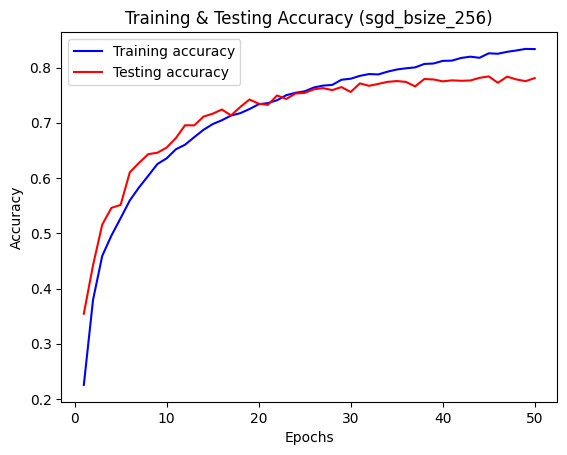

In [ ]:
import csv
import matplotlib.pyplot as plt

# Save accuracies to CSV file
with open('accuracies_cifar1_sgd_bsize_256.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Epoch', 'Training Accuracy', 'Testing Accuracy'])
    for i, (train_acc, test_acc) in enumerate(zip(train_accuracy_list, test_accuracy_list)):
        writer.writerow([i+1, train_acc, test_acc])

# Plotting
epochs = range(1, len(train_accuracy_list) + 1)
plt.plot(epochs, train_accuracy_list, 'b', label='Training accuracy')
plt.plot(epochs, test_accuracy_list, 'r', label='Testing accuracy')
plt.title('Training & Testing Accuracy (sgd_bsize_256)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:

from keras.datasets import mnist

In [ ]:
(trainX, trainy), (testX, testy) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


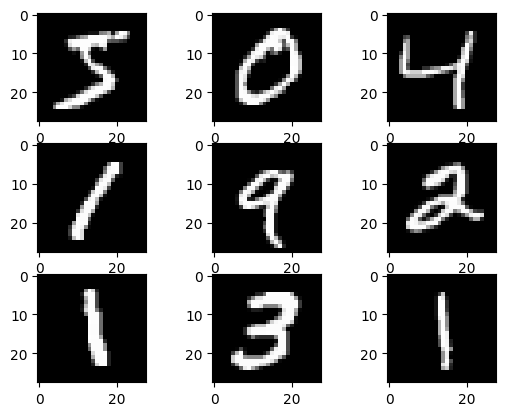

In [ ]:
import matplotlib.pyplot as plt
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
trainX.shape

(60000, 28, 28)

In [ ]:
testX.shape

(10000, 28, 28)

In [ ]:
accuracy_test=[]
accuracy_train=[]

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.utils import to_categorical
from keras.optimizers import RMSprop

trainy = to_categorical(trainy)
testy = to_categorical(testy)
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# sgd = SGD (lr = 0.01, momentum = 0.9)
rmsprop = RMSprop(lr=0.001)
model.compile(optimizer=rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(trainX, trainy, epochs= 50, batch_size=256, validation_data=(testX, testy))

train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

train_accuracy_list = []
test_accuracy_list = []

for i, (train_acc, test_acc) in enumerate(zip(train_accuracy, test_accuracy)):
    if (i + 1) % 10 == 0:
        print(f'Epoch {i + 1}: Training Accuracy {train_acc}, Testing Accuracy {test_acc}')
    train_accuracy_list.append(train_acc)
    test_accuracy_list.append(test_acc)

_, accuracy_t = model.evaluate(testX, testy)
print('Final Testing Accuracy: %.2f' % (accuracy_t * 100))


Epoch 1/50
235/235 [==============================] - 6s 10ms/step - loss: 22.3199 - accuracy: 0.6749 - val_loss: 1.1243 - val_accuracy: 0.8220
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6379 - accuracy: 0.8410 - val_loss: 0.4642 - val_accuracy: 0.8860
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.4291 - accuracy: 0.8921 - val_loss: 0.7973 - val_accuracy: 0.8891
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.3250 - accuracy: 0.9171 - val_loss: 0.2014 - val_accuracy: 0.9566
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2668 - accuracy: 0.9339 - val_loss: 0.1534 - val_accuracy: 0.9628
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2312 - accuracy: 0.9433 - val_loss: 0.1773 - val_accuracy: 0.9620
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2094 - accuracy: 0.9500 - val_loss: 0.1700 - val_accuracy: 0.9675
Ep

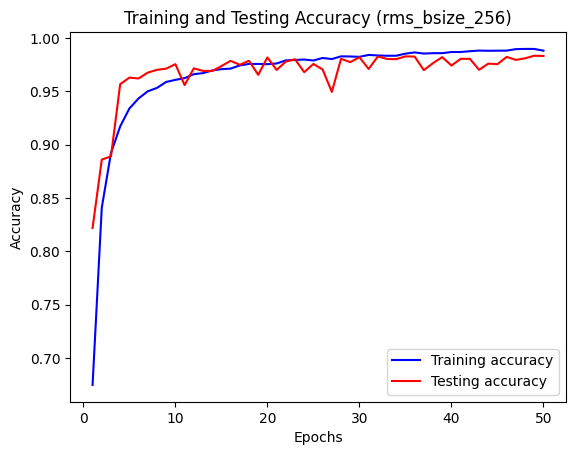

In [ ]:
import csv
import matplotlib.pyplot as plt

# Save accuracies to CSV file
with open('accuracies_mnist_rms_bsize_256.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Epoch', 'Training Accuracy', 'Testing Accuracy'])
    for i, (train_acc, test_acc) in enumerate(zip(train_accuracy_list, test_accuracy_list)):
        writer.writerow([i+1, train_acc, test_acc])

# Plotting
epochs = range(1, len(train_accuracy_list) + 1)
plt.plot(epochs, train_accuracy_list, 'b', label='Training accuracy')
plt.plot(epochs, test_accuracy_list, 'r', label='Testing accuracy')
plt.title('Training and Testing Accuracy (rms_bsize_256)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()